## 课程基本信息

- **课程名称**：大数据与商务智能 - 大语言模型应用开发实践
- **授课对象**：中山大学工商管理非全专硕MBA学生
- **课时**：3学时（上机课）
- **前置知识**：基础Python编程

完成本课程后，您将能够：
1. 独立搭建本地大语言模型运行环境
2. 使用Python脚本调用在线和本地LLM服务
3. 通过Cherry Studio可视化工具开发LLM应用
4. 设计结构化系统提示词提升AI响应质量
5. 开发简单的LLM应用解决实际业务问题

## 1. LLM服务准备

### 1.1.1 在线LLM API获取（以通义千问为例）

通义千问是阿里云提供的大语言模型服务，通过阿里云百炼平台提供API调用方式，适合中文场景应用开发，提供免费额度和按量计费两种模式。

#### 1.1.1.1 获取在线API

官方文档：https://bailian.console.aliyun.com/?tab=doc#/doc/?type=model&url=2840915

1. **注册阿里云账号**  
   访问阿里云官网：https://www.aliyun.com/ ，注册并完成实名认证

2. **开通通义千问服务**  
   - 访问阿里云百炼平台：https://bailian.aliyun.com/
   - 点击"立即开通"，完成服务开通流程

3. **创建API密钥**  
   - 登录后点击右上角"创建我的API-KEY"
   - 选择默认业务空间（或创建新空间）
   - 点击"确定"生成API密钥
   - 点击"查看"并复制生成的API密钥

4. **获取API端点**  
   通义千问API地址：https://dashscope.aliyuncs.com/api/v1/services/aigc/text-generation/generation

#### 1.1.1.2 环境变量设置（以Windows系统为例）

把API Key配置到环境变量，从而避免在代码里显式地配置API Key，降低泄漏风险：
1. 在Windows系统桌面中按Win+Q键，在搜索框中搜索编辑系统环境变量，单击打开系统属性界面。

2. 在系统属性窗口，单击环境变量，然后在系统变量区域下单击新建，变量名填入DASHSCOPE_API_KEY，变量值填入您的DashScope API Key。

    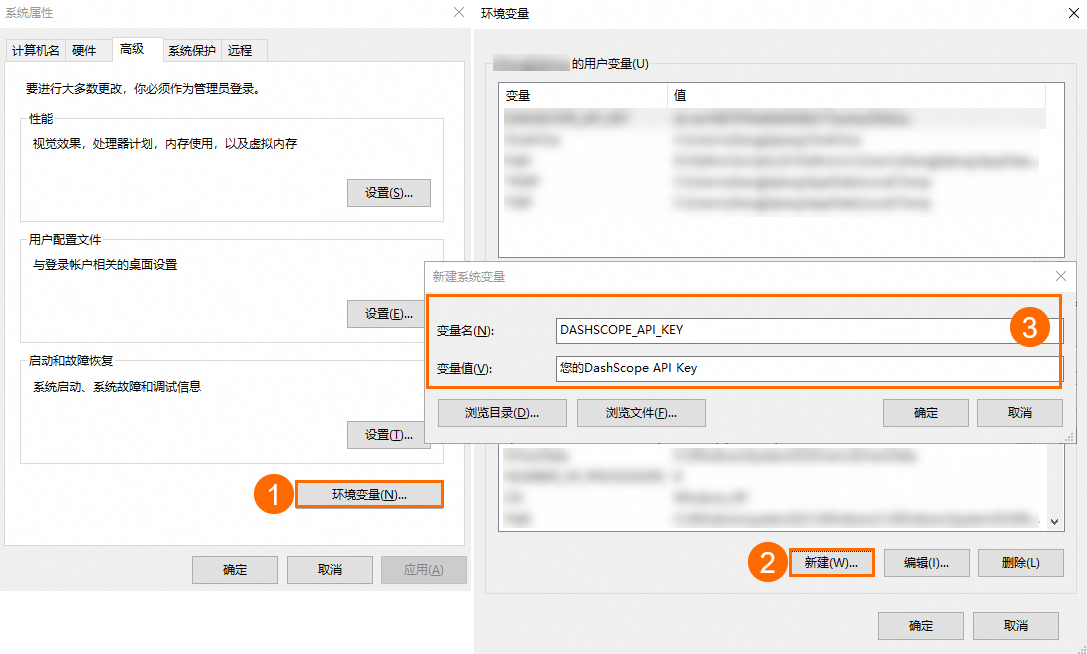

3. 依次单击三个窗口的确定，关闭系统属性配置页面，完成环境变量配置。

#### 1.1.1.3 验证API配置

**方法1**：使用命令提示符（CMD），运行
```bash
echo %DASHSCOPE_API_KEY%
```
如果正确显示API Key，说明环境变量配置成功。

**方法2**：使用Powershell，运行
```bash
echo $env:DASHSCOPE_API_KEY
```
如果正确显示API Key，说明环境变量配置成功。

### 1.1.2 本地LLM部署（Qwen 4B模型）

1. **安装Ollama工具**：访问 https://ollama.com/download
2. **下载Qwen 4B模型**
    进入命令提示符或powershell界面，运行以下命令下载模型：
    ```bash
    ollama pull qwen:4b
    ```
3. **验证部署**：
    运行以下命令启动模型：
    ```bash
    ollama run qwen:4b
    ```
    输入"你好"测试响应

## 1.2. 使用Python脚本调用LLM

### 1.2.1 调用在线API（通义千问）

In [ ]:
import requests
import os
from dotenv import load_dotenv

load_dotenv()

def call_tongyi_api(prompt):
    """调用通义千问API"""
    response = requests.post(
        "https://dashscope.aliyuncs.com/api/v1/services/aigc/text-generation/generation",
        headers={
            "Content-Type": "application/json",
            "Authorization": f"Bearer {os.getenv('TONGYI_API_KEY')}"
        },
        json={
            "model": "qwen-plus",
            "input": {"prompt": prompt},
            "parameters": {"temperature": 0.7}
        }
    )
    
    return response.json()["output"]["text"]

# 使用示例
if __name__ == "__main__":
    print(call_tongyi_api("分析中小企业使用CRM的收益"))

### 1.2.2 调用本地Qwen模型

In [ ]:
import requests

def call_local_llm(prompt, model="qwen:4b", temperature=0.7):
    """调用本地Qwen模型"""
    response = requests.post(
        "http://localhost:11434/api/generate",
        json={
            "model": model,
            "prompt": prompt,
            "stream": False,
            "options": {"temperature": temperature}
        }
    )
    
    return response.json()["response"]

# 使用示例
if __name__ == "__main__":
    prompt = "分析智能手表的3个核心客户群体"
    print(call_local_llm(prompt))

## 1.3 使用Cherry Studio调用LLM

### 1.3.1 Cherry Studio简介

#### 工具特点
- 可视化界面设计，无需编程
- 支持多种LLM模型集成
- 内置提示词管理和测试功能

### 1.3.2 下载与安装
1. 访问Cherry Studio官网：https://www.cherryai.com/
2. 下载并安装对应操作系统版本
3. 完成注册并登录

### 1.3.3 配置本地Qwen模型
1. 进入"模型管理"→"添加模型"
2. 选择"本地Ollama"，系统自动检测Qwen模型
3. 选择"qwen:4b"，点击"测试连接"验证

### 1.3.4 配置通义千问在线模型

#### 在Cherry Studio中配置
1. 打开Cherry Studio，进入"设置"→"模型服务"
2. 找到"阿里云百炼"，粘贴已有的API密钥
3. 点击"保存"并"测试连接"
4. 进入"模型管理"，添加通义千问模型（如qwen-plus）

#### 验证配置
1. 创建简单应用，添加"LLM调用"组件
2. 选择通义千问模型，输入提示词测试
3. 运行应用，确认能正常生成响应

### 1.3.5 本地与在线模型对比

| 特性 | 本地Qwen模型 | 通义千问在线模型 |
|------|-------------|----------------|
| 数据隐私 | 高（本地处理） | 低（数据上传） |
| 使用成本 | 一次性下载 | 按Token计费 |
| 网络依赖 | 无 | 必须联网 |
| 模型更新 | 手动更新 | 自动更新 |
| 性能要求 | 较高（需本地资源） | 较低（云端处理） |

## 1.4 系统提示词设计

### 1.4.1 基础结构
```markdown
# 系统角色
你是[专业角色]，拥有[经验背景]。

## 任务要求
[详细描述任务内容和目标]

## 输出格式
[指定回答的结构和格式]
```

### 1.4.2 脑筋急转弯生成示例
```markdown
# 系统角色
你是专业谜语创作者，擅长设计中文脑筋急转弯。

## 难度要求
- 简单：适合儿童，答案直接
- 困难：包含双关语或多步推理

## 输出格式
**题目**：[脑筋急转弯题目]
**答案**：[简洁回答]
**解析**：[解释幽默原理]
```

## 1.5 课程作业：定制脑筋急转弯LLM

### 1.5.1 作业目标
使用Cherry Studio开发脑筋急转弯生成器，支持在线/本地模型切换，能生成不同难度的题目并解释答案。

### 1.5.2 具体要求
1. **功能要求**：
   - 支持简单/困难难度选择
   - 可输入自定义主题
   - 显示题目、答案和解析

2. **实现步骤**：
   - 配置至少一种模型（本地Qwen或在线通义千问）
   - 设计系统提示词定义生成规则
   - 创建包含难度选择的交互界面
   - 测试并优化生成效果

3. **提交内容**：
   - 3个生成示例（含解析）
   - 应用界面截图
   - 开发总结（说明模型选择理由）